# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df = pd.read_csv('/content/drive/MyDrive/Summer 2024/MIT Course/Project 2/ExtraaLearn.csv')
print(df.head())

       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

## Data Overview

- Observations
- Sanity checks

In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [91]:
print(df.describe())

               age  website_visits  time_spent_on_website  \
count  4612.000000     4612.000000            4612.000000   
mean     46.201214        3.566782             724.011275   
std      13.161454        2.829134             743.828683   
min      18.000000        0.000000               0.000000   
25%      36.000000        2.000000             148.750000   
50%      51.000000        3.000000             376.000000   
75%      57.000000        5.000000            1336.750000   
max      63.000000       30.000000            2537.000000   

       page_views_per_visit       status  
count           4612.000000  4612.000000  
mean               3.026126     0.298569  
std                1.968125     0.457680  
min                0.000000     0.000000  
25%                2.077750     0.000000  
50%                2.792000     0.000000  
75%                3.756250     1.000000  
max               18.434000     1.000000  


####Observations:
* There are several object features, many of which can simply be represented as binary (Yes/No: 1/0)
* Some other object features could be label encoded (like 'profile_complete', which has an understandable progression), while others need dummy variables (like 'current_occupation')
* 'status' is the target variable
* No missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [92]:
print("There are", len(df['ID'].unique()), "unique IDs, meaning each entry has a unique ID.") # Creates array of unique IDs, then prints out length
print("Thus, this feature is unlikely to influence the target variable.")

There are 4612 unique IDs, meaning each entry has a unique ID.
Thus, this feature is unlikely to influence the target variable.


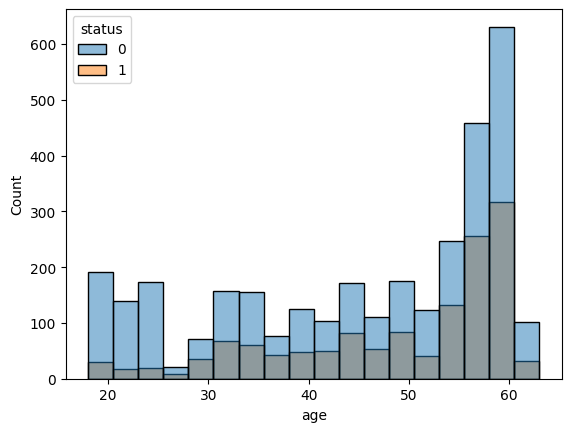


Potential lead ages are relatively consistent, with a spike around 55-60 years old, making it left-skewed.

Average age of converted leads: 48.66
Average age of non-converted leads: 45.15

There does not initially appear to be a strong correlation between age and lead conversion,
though the countplot demonstrates how younger leads are less likely to convert.


In [93]:
sns.histplot(data=df, x='age', hue='status') # Histogram with x-axis of 'age' and separating by 'status'
plt.show()

print(f"\nPotential lead ages are relatively consistent, with a spike around 55-60 years old, making it left-skewed.")

age_converted = df[df['status'] == 1]['age'].mean() # Finds the mean age of entries with a 'status' of 1
age_not_converted = df[df['status'] == 0]['age'].mean()

print(f"\nAverage age of converted leads: {age_converted:.2f}") # Rounds float variable to 2 decimal points
print(f"Average age of non-converted leads: {age_not_converted:.2f}")

print(f"\nThere does not initially appear to be a strong correlation between age and lead conversion,\nthough the countplot demonstrates how younger leads are less likely to convert.")

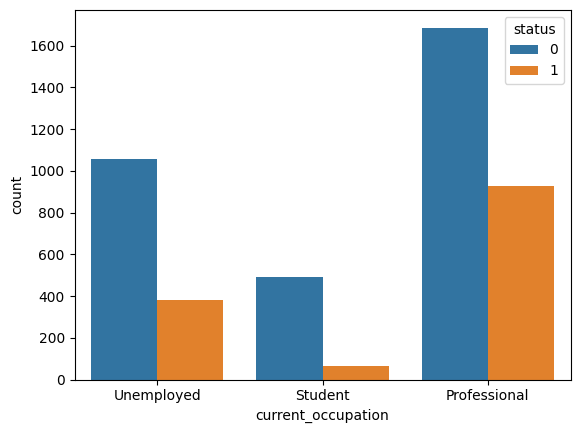


Percentage of unemployed leads to be converted: 26.58%
Percentage of student leads to be converted: 11.71%
Percentage of professional leads to be converted: 35.51%

It appears students are less likely to be converted, potentially because they are already enrolled in courses.
Professionals are most likely to be converted.


In [94]:
sns.countplot(x='current_occupation', hue='status', data=df, order=['Unemployed', 'Student', 'Professional']) # Creates a count plot with x-axis of 'current_occupaion', separating by 'status', and in the specified order
plt.show()

perc_unemployed = df[df['current_occupation'] == 'Unemployed']['status'].mean() * 100 # Finds the percentage of entries whose 'current_occupation' is 'Unemployed' to be converted. This works because 'status' is either 0 or 1, so determining the mean (and then multiplying by 100) is the same thing as the percentage of converted leads
perc_student = df[df['current_occupation'] == 'Student']['status'].mean() * 100
perc_professional = df[df['current_occupation'] == 'Professional']['status'].mean() * 100

print(f"\nPercentage of unemployed leads to be converted: {perc_unemployed:.2f}%")
print(f"Percentage of student leads to be converted: {perc_student:.2f}%")
print(f"Percentage of professional leads to be converted: {perc_professional:.2f}%")

print(f"\nIt appears students are less likely to be converted, potentially because they are already enrolled in courses.")
print("Professionals are most likely to be converted.")

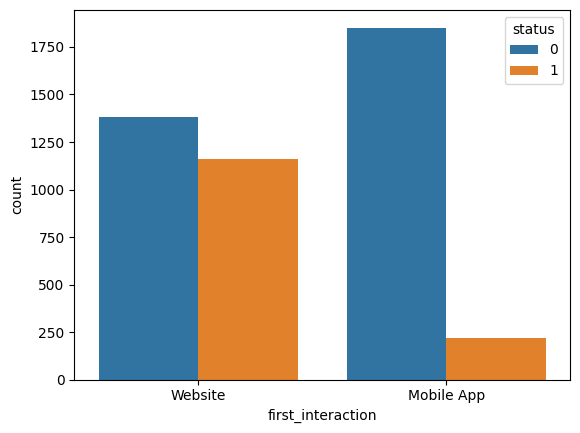


Percentage of website leads to be converted: 45.59%
Percentage of mobile app leads to be converted: 10.53%

It appears website leads are much more likely to be converted than mobile app leads.


In [95]:
sns.countplot(x='first_interaction', hue='status', data=df)
plt.show()

perc_website = df[df['first_interaction'] == 'Website']['status'].mean() * 100
perc_mobile = df[df['first_interaction'] == 'Mobile App']['status'].mean() * 100

print(f"\nPercentage of website leads to be converted: {perc_website:.2f}%")
print(f"Percentage of mobile app leads to be converted: {perc_mobile:.2f}%")

print(f"\nIt appears website leads are much more likely to be converted than mobile app leads.")

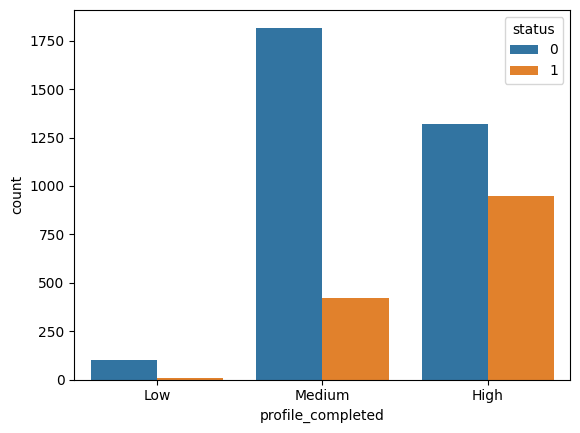


Percentage of low profile leads to be converted: 7.48%
Percentage of medium profile leads to be converted: 18.88%
Percentage of high profile leads to be converted: 41.78%

It appears that the more complete a lead's profile is, the more likely they are to convert.


In [96]:
sns.countplot(x='profile_completed', hue='status', data=df, order=['Low', 'Medium', 'High'])
plt.show()

perc_low = df[df['profile_completed'] == 'Low']['status'].mean() * 100
perc_medium = df[df['profile_completed'] == 'Medium']['status'].mean() * 100
perc_high = df[df['profile_completed'] == 'High']['status'].mean() * 100

print(f"\nPercentage of low profile leads to be converted: {perc_low:.2f}%")
print(f"Percentage of medium profile leads to be converted: {perc_medium:.2f}%")
print(f"Percentage of high profile leads to be converted: {perc_high:.2f}%")

print(f"\nIt appears that the more complete a lead's profile is, the more likely they are to convert.")

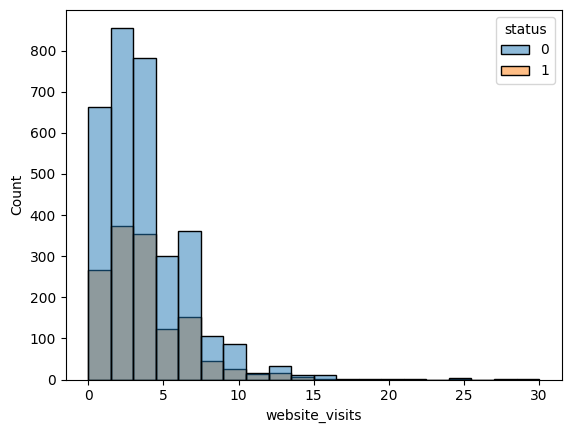


Website visits is right-skewed.

Average website visits for converted leads: 3.54
Average website visits for not converted leads: 3.58

There does not seem to be a strong correlation between website visits and lead conversion.


In [97]:
sns.histplot(x='website_visits', hue='status', data=df, bins=20)
plt.show()

print(f"\nWebsite visits is right-skewed.")

web_visits_converted = df[df['status'] == 1]['website_visits'].mean()
web_visits_not_converted = df[df['status'] == 0]['website_visits'].mean()

print(f"\nAverage website visits for converted leads: {web_visits_converted:.2f}")
print(f"Average website visits for not converted leads: {web_visits_not_converted:.2f}")

print(f"\nThere does not seem to be a strong correlation between website visits and lead conversion.")

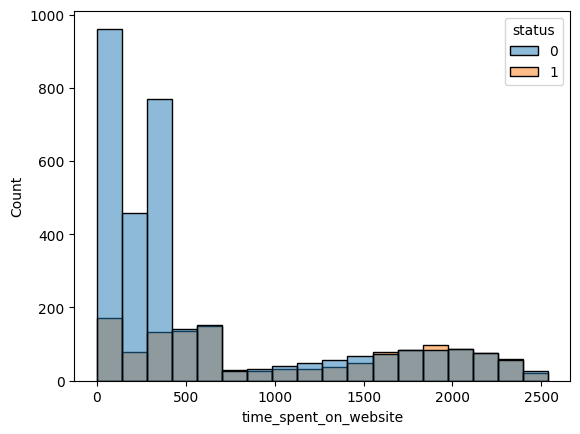


Time on website is right-skewed.

Average time spent on website for converted leads: 1068.40
Average time spent on website for not converted leads: 577.42

Converted leads, on average, spend twice as much time on the website than non-converted leads.


In [98]:
sns.histplot(x='time_spent_on_website', hue='status', data=df)
plt.show()

print(f"\nTime on website is right-skewed.")

time_on_web_converted = df[df['status'] == 1]['time_spent_on_website'].mean()
time_on_web_not_converted = df[df['status'] == 0]['time_spent_on_website'].mean()

print(f"\nAverage time spent on website for converted leads: {time_on_web_converted:.2f}")
print(f"Average time spent on website for not converted leads: {time_on_web_not_converted:.2f}")

print(f"\nConverted leads, on average, spend twice as much time on the website than non-converted leads.")

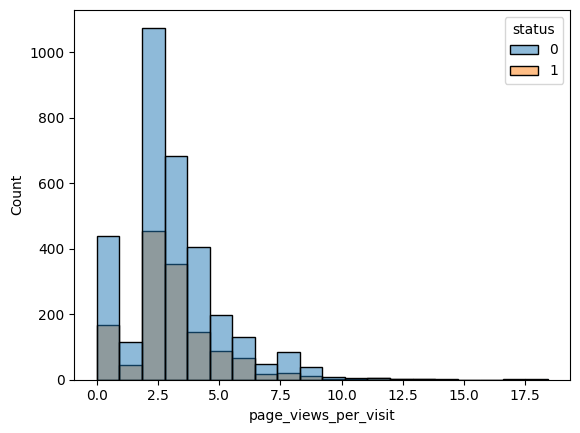


Page views per visit is right-skewed.

Average page views per visit for converted leads: 3.03
Average page views per visit for not converted leads: 3.03

There does not seem to be a strong correlation between page viws per visit and lead conversion.


In [99]:
sns.histplot(x='page_views_per_visit', hue='status', data=df, bins=20)
plt.show()

print(f"\nPage views per visit is right-skewed.")

page_views_per_visit_converted = df[df['status'] == 1]['page_views_per_visit'].mean()
page_views_per_visit_not_converted = df[df['status'] == 0]['page_views_per_visit'].mean()

print(f"\nAverage page views per visit for converted leads: {page_views_per_visit_converted:.2f}")
print(f"Average page views per visit for not converted leads: {page_views_per_visit_not_converted:.2f}")

print(f"\nThere does not seem to be a strong correlation between page viws per visit and lead conversion.")

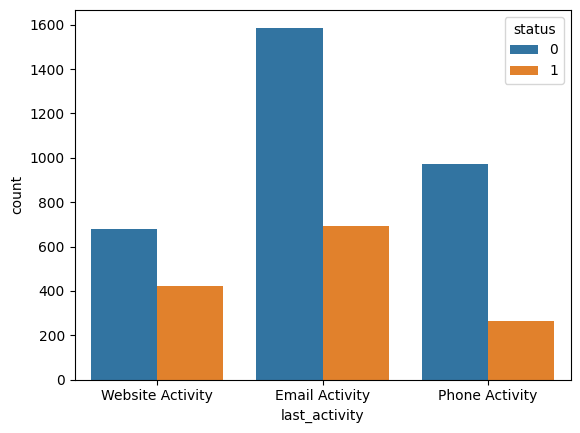


Percentage of website leads to be converted: 38.45%
Percentage of email leads to be converted: 30.33%
Percentage of phone leads to be converted: 21.31%

Leads whose most recent activity was on the website seem most likely to convert,
while those whose most recent was phone activity are least likely.


In [100]:
sns.countplot(x='last_activity', hue='status', data=df)
plt.show()

perc_last_website = df[df['last_activity'] == 'Website Activity']['status'].mean() * 100
perc_last_email = df[df['last_activity'] == 'Email Activity']['status'].mean() * 100
perc_last_phone = df[df['last_activity'] == 'Phone Activity']['status'].mean() * 100

print(f"\nPercentage of website leads to be converted: {perc_last_website:.2f}%")
print(f"Percentage of email leads to be converted: {perc_last_email:.2f}%")
print(f"Percentage of phone leads to be converted: {perc_last_phone:.2f}%")

print(f"\nLeads whose most recent activity was on the website seem most likely to convert,\nwhile those whose most recent was phone activity are least likely.")

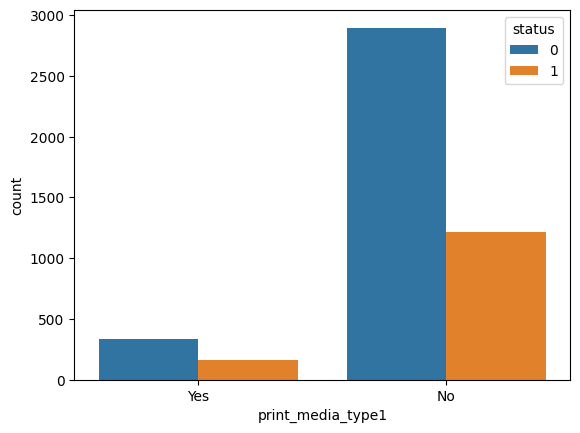

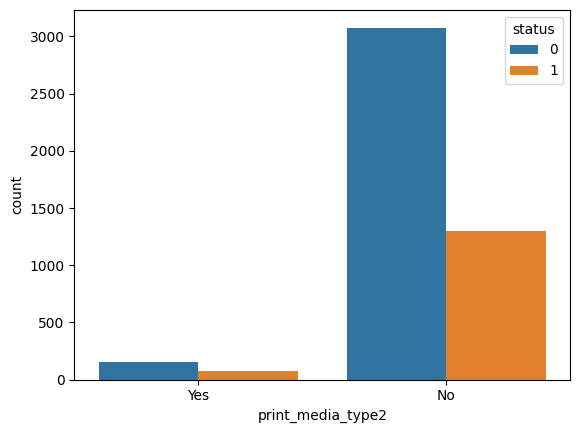


Conversion rate of leads who saw the Newspaper ad: 31.99%
Conversion rate of leads who didn't see the Newspaper ad: 29.60%

Conversion rate of leads who saw the Magazine ad: 32.19%
Conversion rate of leads who didn't see the Magazine ad: 29.73%

It appears that the Newspaper and Magazine ads had similar effect, boosting conversion rate by approximately 2.5%.


In [101]:
sns.countplot(x='print_media_type1', hue='status', data=df)
plt.show()
print()
sns.countplot(x='print_media_type2', hue='status', data=df, order=['Yes', 'No'])
plt.show()

perc_seen_print1 = df[df['print_media_type1'] == 'Yes']['status'].mean() * 100
perc_not_seen_print1 = df[df['print_media_type1'] == 'No']['status'].mean() * 100
perc_seen_print2 = df[df['print_media_type2'] == 'Yes']['status'].mean() * 100
perc_not_seen_print2 = df[df['print_media_type2'] == 'No']['status'].mean() * 100

print(f"\nConversion rate of leads who saw the Newspaper ad: {perc_seen_print1:.2f}%")
print(f"Conversion rate of leads who didn't see the Newspaper ad: {perc_not_seen_print1:.2f}%")
print(f"\nConversion rate of leads who saw the Magazine ad: {perc_seen_print2:.2f}%")
print(f"Conversion rate of leads who didn't see the Magazine ad: {perc_not_seen_print2:.2f}%")

print(f"\nIt appears that the Newspaper and Magazine ads had similar effect, boosting conversion rate by approximately 2.5%.")

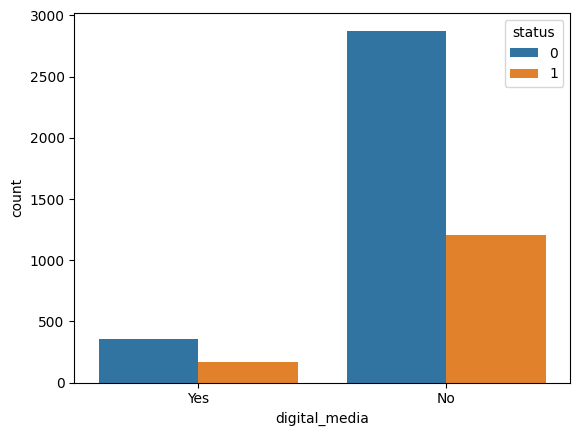


Conversion rate of leads who saw the digital ad: 31.88%
Conversion rate of leads who didn't see the digital ad: 29.60%

The digital media ad was slightly less effective than the Newspaper and Magazine ad, boosting conversion rate by ~2.25%.


In [102]:
sns.countplot(x='digital_media', hue='status', data=df)
plt.show()

perc_seen_digital = df[df['digital_media'] == 'Yes']['status'].mean() * 100
perc_not_seen_digital = df[df['digital_media'] == 'No']['status'].mean() * 100

print(f"\nConversion rate of leads who saw the digital ad: {perc_seen_digital:.2f}%")
print(f"Conversion rate of leads who didn't see the digital ad: {perc_not_seen_digital:.2f}%")

print(f"\nThe digital media ad was slightly less effective than the Newspaper and Magazine ad, boosting conversion rate by ~2.25%.")

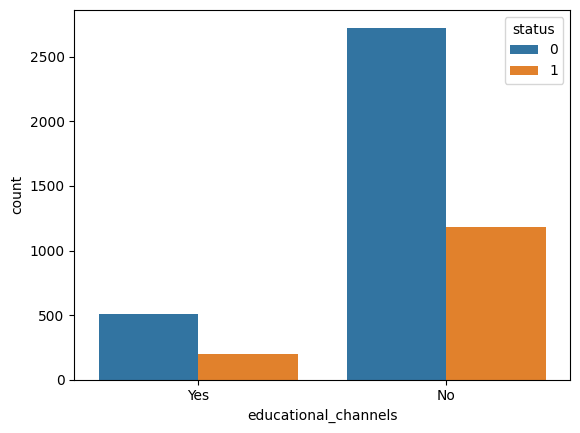


Conversion rate of leads who saw the education ad: 27.94%
Conversion rate of leads who didn't see the education ad: 30.20%

Those who saw the educational ad were actually less likely to convert than those who hadn't.
It is unlikely the ad had a negative effect; rather, it is probable the ad reached an audience
that was less likely to convert (higher proportion of students).


In [103]:
sns.countplot(x='educational_channels', hue='status', data=df, order=['Yes', 'No'])
plt.show()

perc_seen_educ = df[df['educational_channels'] == 'Yes']['status'].mean() * 100
perc_not_seen_educ = df[df['educational_channels'] == 'No']['status'].mean() * 100

print(f"\nConversion rate of leads who saw the education ad: {perc_seen_educ:.2f}%")
print(f"Conversion rate of leads who didn't see the education ad: {perc_not_seen_educ:.2f}%")

print(f"\nThose who saw the educational ad were actually less likely to convert than those who hadn't.")
print("It is unlikely the ad had a negative effect; rather, it is probable the ad reached an audience\nthat was less likely to convert (higher proportion of students).")

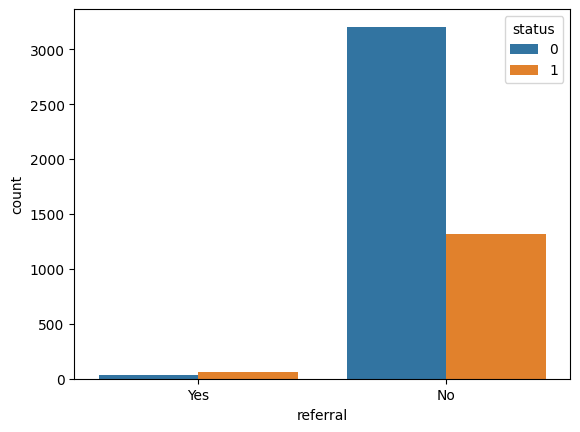


Conversion rate of leads who were referred: 67.74%
Conversion rate of leads who weren't referred: 29.08%

There is substantially fewer people who were referred (93 referred out of 4612 total), so the results are less reliable.
However, leads who were referred were much more likely to convert than those who weren't.


In [104]:
sns.countplot(x='referral', hue='status', data=df, order=['Yes', 'No'])
plt.show()

perc_referred = df[df['referral'] == 'Yes']['status'].mean() * 100
perc_not_referred = df[df['referral'] == 'No']['status'].mean() * 100

print(f"\nConversion rate of leads who were referred: {perc_referred:.2f}%")
print(f"Conversion rate of leads who weren't referred: {perc_not_referred:.2f}%")

print(f"\nThere is substantially fewer people who were referred ({df['referral'].value_counts().iloc[1]} referred out of {df.shape[0]} total), so the results are less reliable.") # Finds number of entries with a 'referral' of 'Yes'
print("However, leads who were referred were much more likely to convert than those who weren't.")

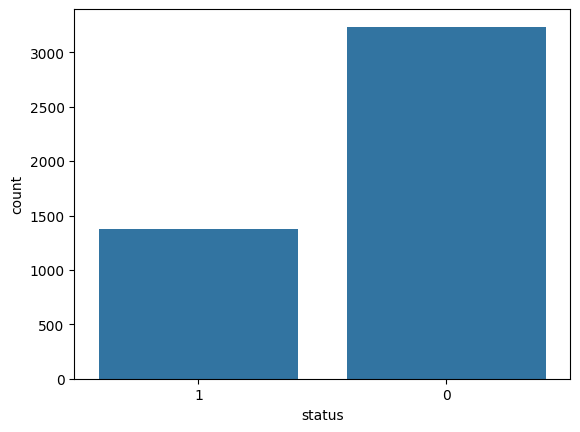


The data is imbalanced, with 1377 leads converted compared to 3235 not converted.
This will be something to consider in model building.


In [105]:
sns.countplot(x='status', data=df, order=[1, 0])
plt.show()

num_converted = df['status'].sum()

print(f"\nThe data is imbalanced, with {num_converted} leads converted compared to {df.shape[0] - num_converted} not converted.")
print("This will be something to consider in model building.")

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [106]:
data = df.drop('ID', axis=1) # Dropping 'ID' column since each row has unique 'ID' and will not contribute to the model

data = pd.get_dummies(data, columns=['current_occupation', 'first_interaction', 'last_activity'], dtype=int) # Getting dummy varriables for non-binary, categorical features with no logical progression (no 0, 1, 2)

data.profile_completed = data.profile_completed.map({'Low': 0, 'Medium': 1, 'High': 2}) # Converting the categorical feature 'profile_completed' to numerical by replacing strings with matching integers

for i in ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']: # For each binary categorical feature which is either 'Yes' or 'No'
    data[i] = data[i].map({'Yes': 1, 'No': 0})

scaler = StandardScaler() # Create a StandardScaler object
data[['age', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']] = scaler.fit_transform(data[['age', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']]) # Scaling non-binary features to improve model building

print(data.head())

        age  profile_completed  website_visits  time_spent_on_website  \
0  0.820575           0.979464        1.213654               1.230240   
1  0.744587          -0.860572       -0.553863              -0.861866   
2  0.440636          -0.860572       -0.200359              -0.529764   
3  0.516624           0.979464        0.153144              -0.349596   
4 -1.763007           0.979464        0.153144              -0.166738   

   page_views_per_visit  print_media_type1  print_media_type2  digital_media  \
0             -0.592062                  1                  0              1   
1             -1.375126                  0                  0              0   
2             -1.500131                  0                  0              1   
3             -0.492464                  0                  0              0   
4              7.057165                  0                  0              0   

   educational_channels  referral  status  current_occupation_Professional  \
0 

## EDA

- It is a good idea to explore the data once again after manipulating it.

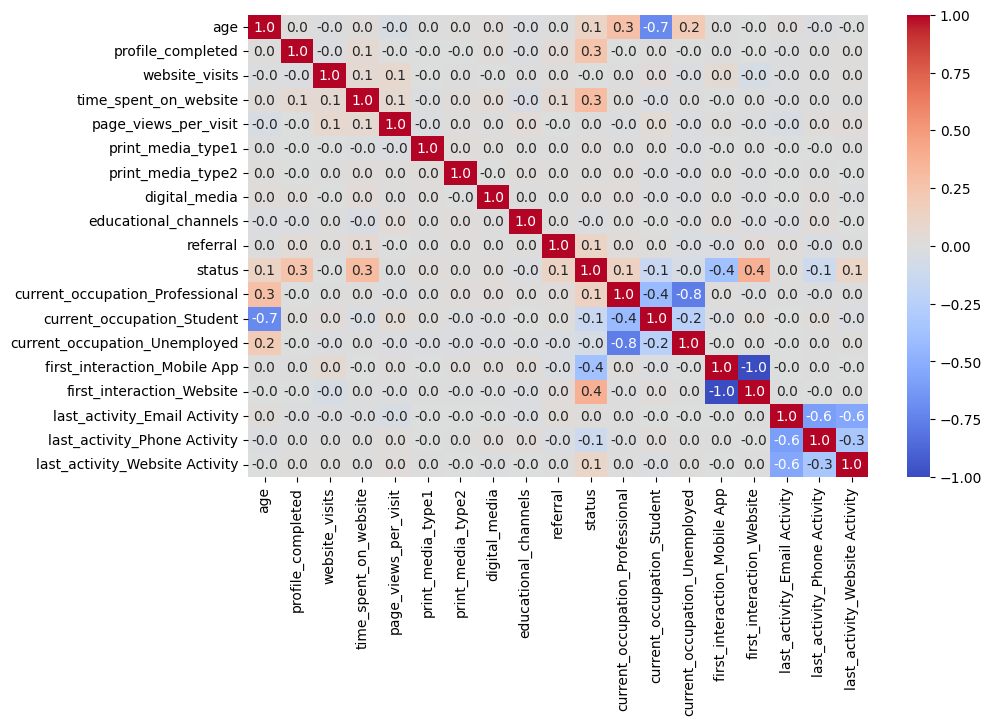


age and current_occupation_Student are negatively correlated. This makes sense, as a user who is a student is likely younger.
first_interaction_Website, time_spent_on_website, and profile_completed are all positively correlated with status, which follows from previous analysis.


In [107]:
plt.figure(figsize=(10, 6)) # Specifying figure size to ease visualization
sns.heatmap(data.corr(), annot=True, fmt='.1f', cmap='coolwarm') # Creates a correlation heatmap, including correlation values and rounding them to 1 decimal point
plt.show()

print(f"\nage and current_occupation_Student are negatively correlated. This makes sense, as a user who is a student is likely younger.")
print("first_interaction_Website, time_spent_on_website, and profile_completed are all positively correlated with status, which follows from previous analysis.")

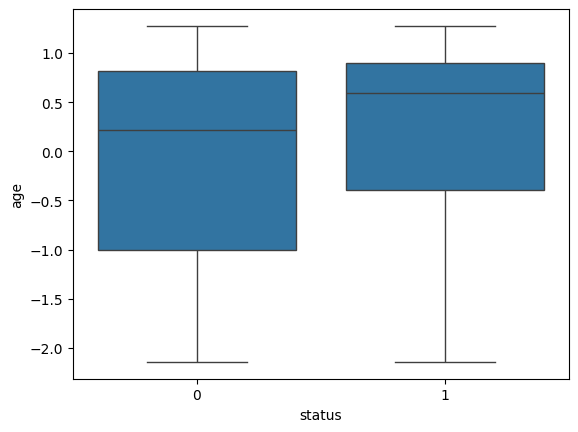

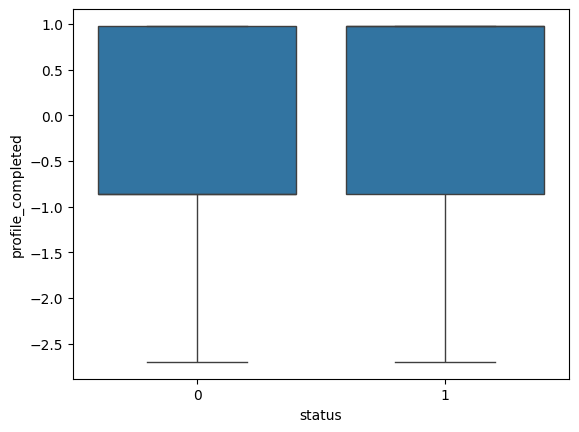

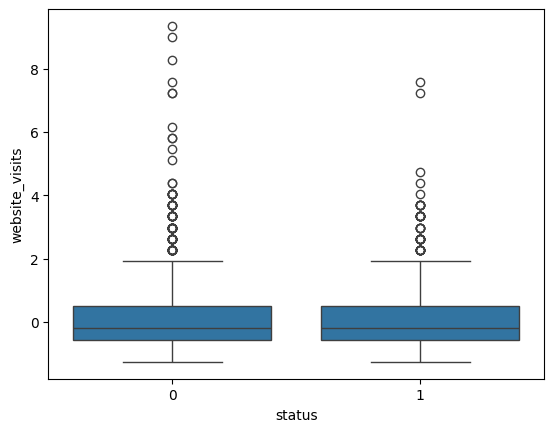

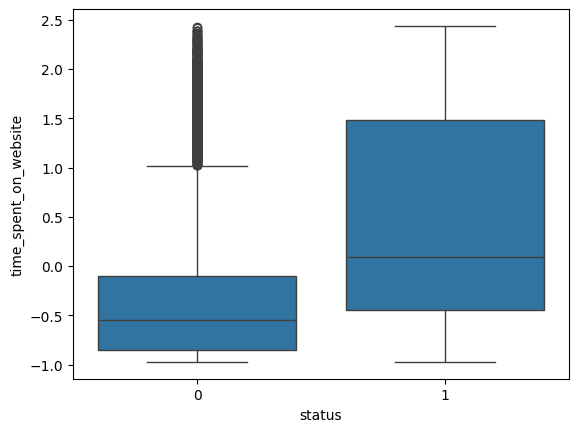

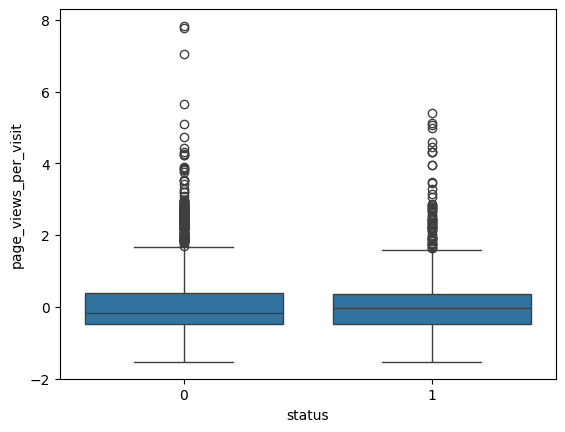


No surprises.


In [108]:
for i in ['age', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']: # For each non-binary feature
    sns.boxplot(x='status', y=i, data=data) # Creates a boxplot with x-axis of 'status' and y-axis of the current feature
    plt.show()

print(f"\nNo surprises.")

## Building a Decision Tree model

In [109]:
X = data.drop('status', axis=1) # Creates a feature DataFrame, dropping the target variable
y = data['status'] # Creates the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Splits the data into test and train sets, with 20% of data being left for testing. Specifies 'random_state' for repeatability

In [110]:
clf = DecisionTreeClassifier(random_state=1) # Creates an ordinary 'DecisionTreeClassifier'
clf.fit(X_train, y_train) # Fits the classifier to the train dataset

train_pred_clf = clf.predict(X_train) # Predicts the target values for the training data
y_pred_clf = clf.predict(X_test) # Predicts the target values for the unseen test data

print(f"Accuracy on Train: {accuracy_score(y_train, train_pred_clf)}") # Prints the accuracy score from the training data
print(f"Accuracy on Test: {accuracy_score(y_test, y_pred_clf)}") # Prints the accuracy score from the test data

print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_clf)}") # Prints the confusion matrix from the test data
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_clf)}") # Prints the confusion matrix from the test data

print(f"\nThe model is overfitting, performing extraordinarily on the train data but worse on the test data.")

Accuracy on Train: 0.9997289238275956
Accuracy on Test: 0.8266522210184182

Confusion Matrix:
[[562  73]
 [ 87 201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       635
           1       0.73      0.70      0.72       288

    accuracy                           0.83       923
   macro avg       0.80      0.79      0.80       923
weighted avg       0.82      0.83      0.83       923


The model is overfitting, performing extraordinarily on the train data but worse on the test data.


## Do we need to prune the tree?

In [111]:
clf_params = {'max_depth': [1, 3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 3, 5, 7, 9]} # Creates a dictionary of parameters and values for the 'GridSearchCV'

clf_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), clf_params, scoring='recall_weighted', cv=5, n_jobs=-1) # Creates a 'GridSearchCV' for the 'DecisionTreeClassifier', inputting the specified paramters to search through and 5 cross-validations
# The scoring metric of 'recall_weighted' is chosen because the objective of the model is to recognize as many likely leads as possible
# Recall is the best metric to capture as many true positives as possible
# The weighted version of recall is selected to account for the imbalance of the target variable
clf_grid.fit(X_train, y_train) # Fits the search object to the train data

print(f"Best parameters: {clf_grid.best_params_}") # Outputs the best parameters for the train data
print(f"Best score: {clf_grid.best_score_}") # Outputs the best score

Best parameters: {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best score: 0.8590403488838145


In [112]:
clf_pruned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=2, random_state=1) # Creates a new 'DecisionTreeClassifier' with the best parameters found from the 'GridSearchCV'
clf_pruned.fit(X_train, y_train)

train_pred_clf_pruned = clf_pruned.predict(X_train)
y_pred_clf_pruned = clf_pruned.predict(X_test)

print(f"Accuracy on Train: {accuracy_score(y_train, train_pred_clf_pruned)}")
print(f"Accuracy on Test: {accuracy_score(y_test, y_pred_clf_pruned)}")

print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_clf_pruned)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_clf_pruned)}")

print(f"\nThe model is performing better on the test data, improving the accuracy on test data from 82.7% to 86.0%.")

Accuracy on Train: 0.8696123610734616
Accuracy on Test: 0.8602383531960996

Confusion Matrix:
[[589  46]
 [ 83 205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       635
           1       0.82      0.71      0.76       288

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923


The model is performing better on the test data, improving the accuracy on test data from 82.7% to 86.0%.


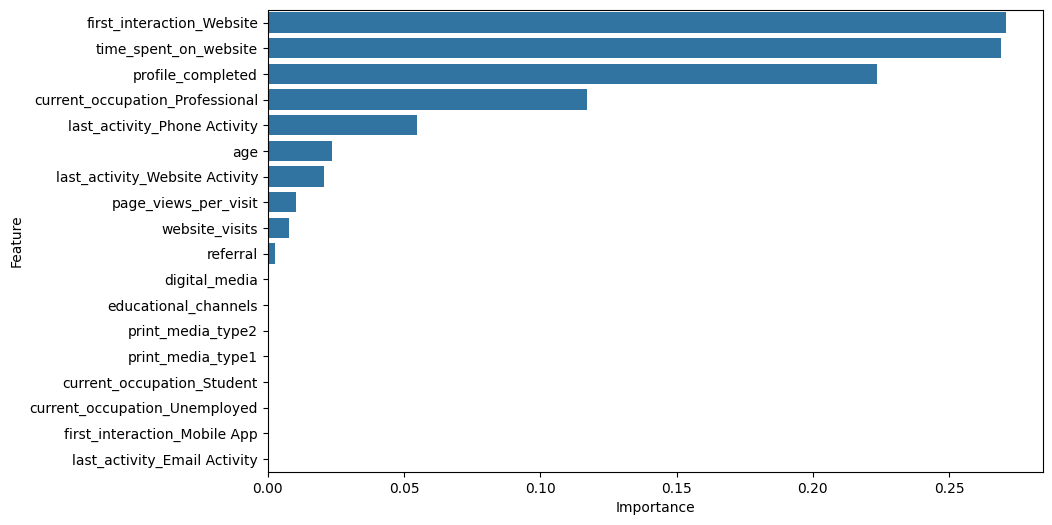


The most important features in this model are first_interaction_Website, time_spent_on_website, and profile_completed.
This follows from the initial bivariate analysis.


In [113]:
feature_importance_clf = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf_pruned.feature_importances_}) # Creates a DataFrame with the feature names and their corresponding feature importances from the 'DecisionTreeClassifier'
feature_importance_clf = feature_importance_clf.sort_values('Importance', ascending=False) # Sorts the DataFrame by feature importance, from most to least

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_clf) # Creates a barplot, showing the most important features of the model
plt.show()

print(f"\nThe most important features in this model are first_interaction_Website, time_spent_on_website, and profile_completed.")
print("This follows from the initial bivariate analysis.")

## Building a Random Forest model

In [114]:
rf = RandomForestClassifier(random_state=1) # Creates an ordinary 'RandomForestClassifier'
rf.fit(X_train, y_train)

train_pred_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy on Train: {accuracy_score(y_train, train_pred_rf)}")
print(f"Accuracy on Test: {accuracy_score(y_test, y_pred_rf)}")

print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_rf)}")

print(f"\nThe model is overfitting, performing extraordinarily on the train data but worse on the test data.")

Accuracy on Train: 0.9997289238275956
Accuracy on Test: 0.8559046587215602

Confusion Matrix:
[[591  44]
 [ 89 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       635
           1       0.82      0.69      0.75       288

    accuracy                           0.86       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.85      0.86      0.85       923


The model is overfitting, performing extraordinarily on the train data but worse on the test data.


## Do we need to prune the tree?

In [115]:
rf_params = {'max_depth': [1, 3, 5, 7], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5, 7]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=1), rf_params, scoring='recall_weighted', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best score: {rf_grid.best_score_}")

Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8693399227072325


In [116]:
rf_pruned = RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=2)
rf_pruned.fit(X_train, y_train)

train_pred_rf_pruned = rf_pruned.predict(X_train)
y_pred_rf_pruned = rf_pruned.predict(X_test)

print(f"Accuracy on Train: {accuracy_score(y_train, train_pred_rf_pruned)}")
print(f"Accuracy on Test: {accuracy_score(y_test, y_pred_rf_pruned)}")

print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_pruned)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_rf_pruned)}")

print(f"\nThe model is performing very marginally better on the test data.")

Accuracy on Train: 0.8766603415559773
Accuracy on Test: 0.8602383531960996

Confusion Matrix:
[[595  40]
 [ 89 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       635
           1       0.83      0.69      0.76       288

    accuracy                           0.86       923
   macro avg       0.85      0.81      0.83       923
weighted avg       0.86      0.86      0.86       923


The model is performing very marginally better on the test data.


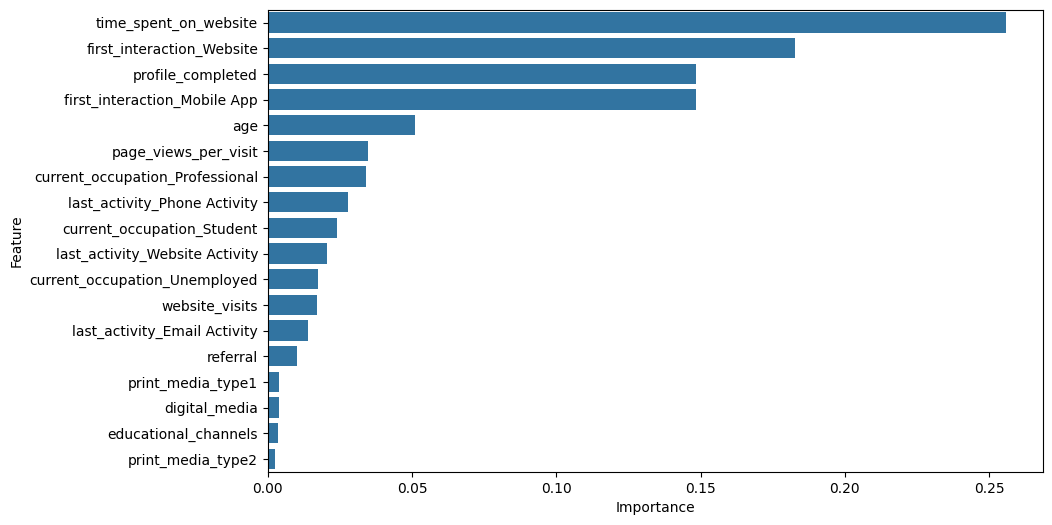


The most important features in this model are time_spent_on_website, first_interaction_Mobile App, and profile_completed.
This is similar to the DecisionTreeClassifier, the main difference being the significance of Mobile App interaction.
Also interesting is how first_interaction_Website is the fourth most important feature in this model.
One key difference between the models is how the 'DecisionTreeClassifier' typically only values one of the dummy variables,
while the 'RandomForestClassifier' often finds multiple important.
This is probably due to the Random Forest being a combination of many smaller trees, which are likely to be more diverse.


In [119]:
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_pruned.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.show()

print(f"\nThe most important features in this model are time_spent_on_website, first_interaction_Mobile App, and profile_completed.")
print("This is similar to the DecisionTreeClassifier, the main difference being the significance of Mobile App interaction.")
print("Also interesting is how first_interaction_Website is the fourth most important feature in this model.")
print("One key difference between the models is how the 'DecisionTreeClassifier' typically only values one of the dummy variables,\nwhile the 'RandomForestClassifier' often finds multiple important.\nThis is probably due to the Random Forest being a combination of many smaller trees, which are likely to be more diverse.")

## Actionable Insights and Recommendations

### Conclusions:
* Both models had an accuracy of approximately 86% on the test data, with the DecisionTreeClassifier performing slightly better overall and in almost every category.
* Despite scoring models based on recall, neither model was great at determining true positives. On the test data, both were around 0.7.
* Both models determined that the most important features were 'time_spent_on_website', 'first_interaction', and 'profile_completed', in some order.
* None of the advertising features seemed to play a significant role in the model.

### Recommendations:
* The most relevant features when predicting lead conversion are 'time_spent_on_website', 'first_interaction', and 'profile_completed'.
 * The more time on the website, the more likely to convert.
 * A first interaction on the website is more likely to convert.
 * The more completed the profile, the more likely to convert.
* Advertising does not seem to play a major effect on lead conversion, so financial investment in advertising should potentially be reconsidered.
* Phone activity is typically much less effective (lower conversion rate) than email activity.
 * Investigating this and perhaps improving phone activity or directing more people to the website may improve in converting leads.